In [7]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [8]:
# Load the CSV file
data_csv = pd.read_csv("./1_After_reconstruction.csv")

# Assuming the data is in the first column
data_array = data_csv.iloc[:,1].values

In [14]:
# Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)
wavelet = 'cmor'

coefficients, frequencies = pywt.cwt(data_array, scales, wavelet)

# Extract the first 10 seconds of data
sampling_rate = 825  # Assuming a sampling rate of 1000 Hz (adjust if different)
first_10_seconds = data_array[:10 * sampling_rate]

# Perform CWT on the first 10 seconds of data
coefficients_10s, frequencies_10s = pywt.cwt(first_10_seconds, scales, wavelet)

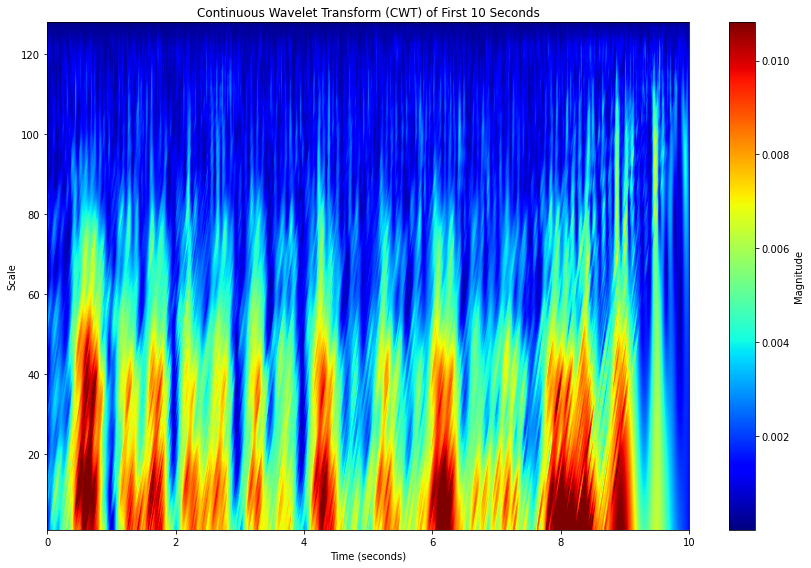

In [15]:
# Plot the CWT for the first 10 seconds
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients_10s), extent=[0, 10, 1, 128], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients_10s), 99))
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) of First 10 Seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale')
plt.tight_layout()

# Showing the image
plt.show()
